# Objective

To predict which customer is more likely to purchase the newly introduced travel package.

TYPE OF PROBLEM: Based upon the objective this is obviously a classification problem. 

DATA DICTIONARY:

1. CustomerID: Unique customer ID
2. ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
3. Age: Age of customer
4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 >Tier 2 > Tier 3
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of trips in a year by customer
12. Passport: The customer has a passport or not (0: No, 1: Yes)
13. OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
14. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer

In [6]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [7]:
## Let's load the specific tab in the xls sheet
data = pd.read_excel("./Tourism.xlsx", 'Tourism')

In [8]:
## copying data to another varaible to avoid any changes to original data
df = data.copy()

In [9]:
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [5]:
## We'll check the shape of the data

df.shape

(4888, 20)

In [6]:
## Checking for duplicaes in the data

df.duplicated().sum()

0

In [7]:
## Retrieve info around the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [8]:
## Summary of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


# Data Preprocessing

In [9]:
df[['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']]

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
0,41.0,6.0,3.0,3.0,1.0,0.0,20993.0
1,49.0,14.0,4.0,4.0,2.0,2.0,20130.0
2,37.0,8.0,4.0,3.0,7.0,0.0,17090.0
3,33.0,9.0,3.0,3.0,2.0,1.0,17909.0
4,NaN,8.0,3.0,4.0,1.0,0.0,18468.0
...,...,...,...,...,...,...,...
4883,49.0,9.0,5.0,4.0,2.0,1.0,26576.0
4884,28.0,31.0,5.0,3.0,3.0,2.0,21212.0
4885,52.0,17.0,4.0,4.0,7.0,3.0,31820.0
4886,19.0,16.0,4.0,3.0,3.0,2.0,20289.0


In [10]:
## Impute NULL Values with Median (except for TypeofContract)
    
df[['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']] = df[['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']].transform(lambda x: x.fillna(x.median()))
df.isnull().sum()


CustomerID                   0
ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

In [11]:
## Bin Age in Buckets

#Junior: <= 25
#Adult: > 25 and <= 40
#Senior: > 40
    
df['Age'] = pd.cut(df.Age, bins= (0, 25, 40, 100), labels = ('Junior', 'Adult', 'Senior'))

In [12]:
## Drop column CustomerID

df.drop(['CustomerID'], axis = 1, inplace = True)

In [13]:
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,Senior,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,Senior,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,Adult,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,Adult,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,Adult,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,Senior,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,Adult,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,1,Senior,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,Junior,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


# EDA

# Univariate Analysis (& Some Initial Bivariate Analysis)

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

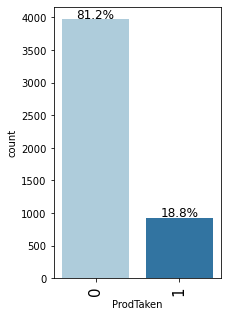

In [16]:
labeled_barplot(data, "ProdTaken",perc=True)

In [17]:
df.groupby(["ProdTaken"]).describe()

CityTier                                               \
             count      mean       std  min  25%  50%  75%  max   
ProdTaken                                                         
0           3968.0  1.615927  0.902434  1.0  1.0  1.0  3.0  3.0   
1            920.0  1.819565  0.958354  1.0  1.0  1.0  3.0  3.0   

          DurationOfPitch             ... NumberOfChildrenVisiting       \
                    count       mean  ...                      75%  max   
ProdTaken                             ...                                 
0                  3968.0  15.056704  ...                      2.0  3.0   
1                   920.0  16.683696  ...                      2.0  3.0   

          MonthlyIncome                                                \
                  count          mean          std      min       25%   
ProdTaken                                                               
0                3968.0  23879.207157  5355.323984   1000.0  20761.00   
1                 920.0  22178.885870  4567.349943  16009.0  18475.25   

                                       
               50%       75%      max  
ProdTaken                              
0          22413.5  25760.25  98678.0  
1          21274.0  23857.50  38537.0  

[2 rows x 88 columns]

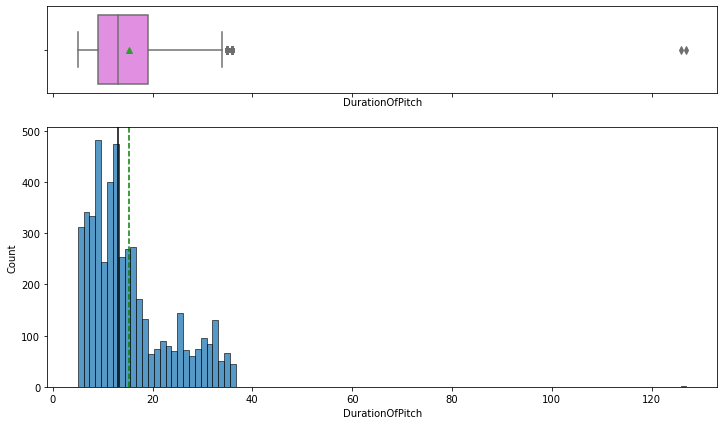

In [18]:
histogram_boxplot(df, "DurationOfPitch")

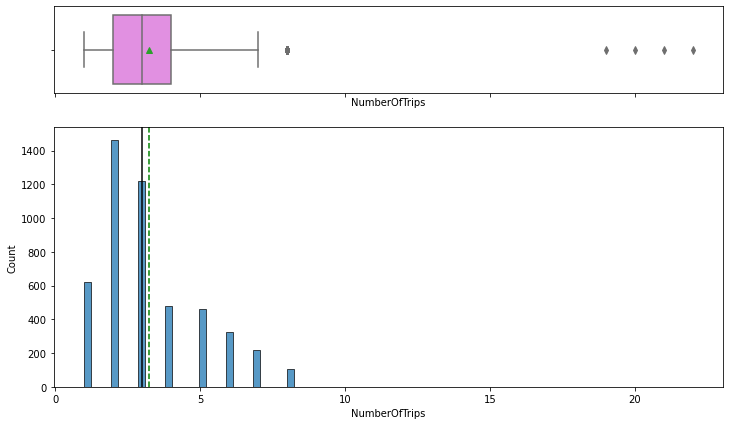

In [19]:
histogram_boxplot(df, "NumberOfTrips")

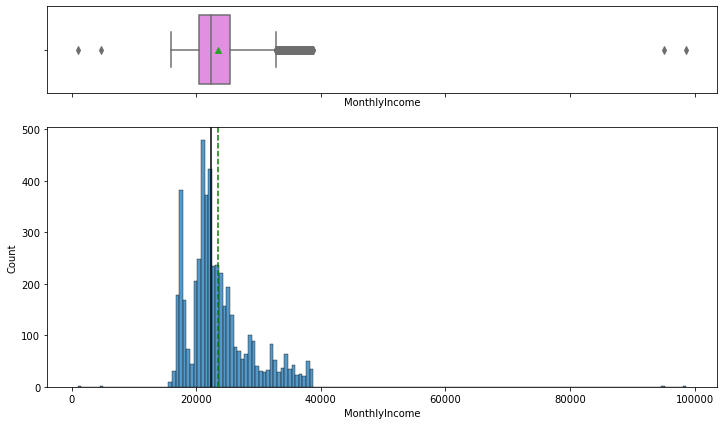

In [20]:
histogram_boxplot(df, "MonthlyIncome")

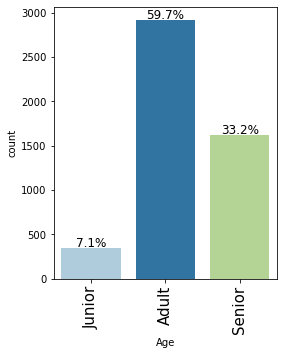

In [21]:
labeled_barplot(df, "Age",perc=True)

<AxesSubplot:xlabel='Age', ylabel='count'>

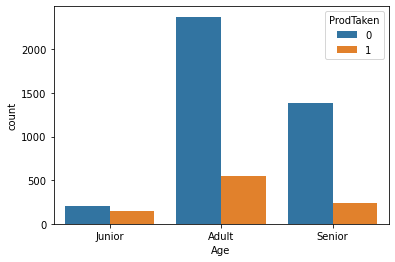

In [22]:
sns.countplot(df['Age'], hue = df['ProdTaken'])

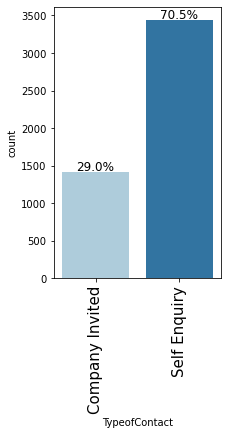

In [23]:
labeled_barplot(df, "TypeofContact",perc=True)

<AxesSubplot:xlabel='TypeofContact', ylabel='count'>

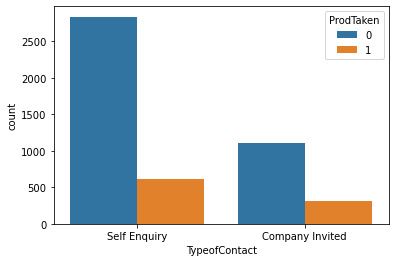

In [24]:
sns.countplot(df['TypeofContact'], hue = df['ProdTaken'])

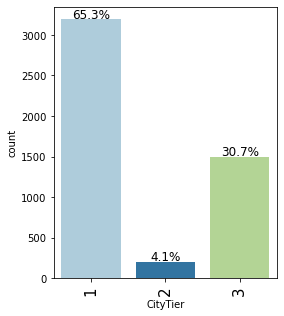

In [25]:
labeled_barplot(df, "CityTier",perc=True)

<AxesSubplot:xlabel='CityTier', ylabel='count'>

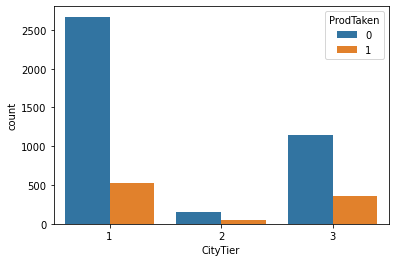

In [26]:
sns.countplot(df['CityTier'], hue = df['ProdTaken'])

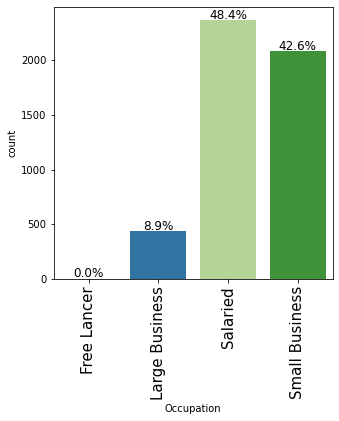

In [27]:
labeled_barplot(df, "Occupation",perc=True)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

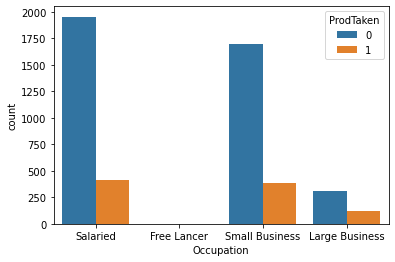

In [28]:
sns.countplot(df['Occupation'], hue = df['ProdTaken'])

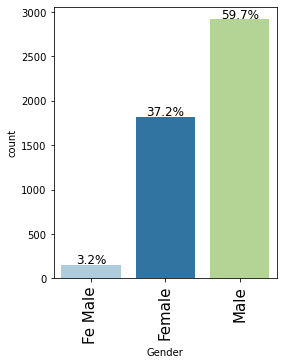

In [29]:
labeled_barplot(df, "Gender",perc=True)

In [30]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')

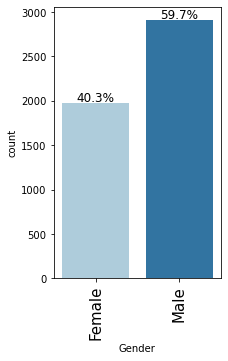

In [31]:
## Check if corrected

labeled_barplot(df, "Gender",perc=True)

<AxesSubplot:xlabel='Gender', ylabel='count'>

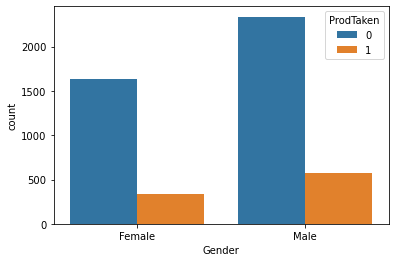

In [32]:
sns.countplot(df['Gender'], hue = df['ProdTaken'])

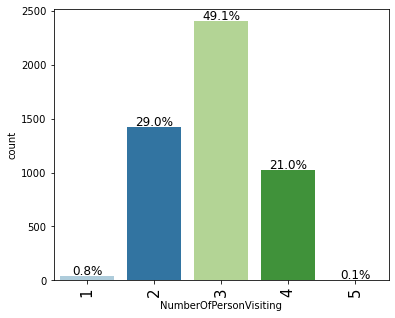

In [33]:
labeled_barplot(df, "NumberOfPersonVisiting",perc=True)

<AxesSubplot:xlabel='NumberOfPersonVisiting', ylabel='count'>

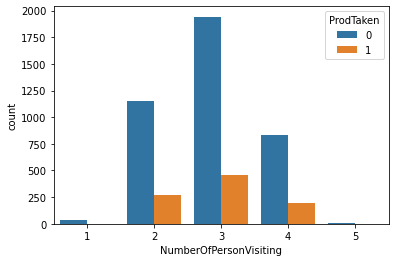

In [34]:
sns.countplot(df['NumberOfPersonVisiting'], hue = df['ProdTaken'])

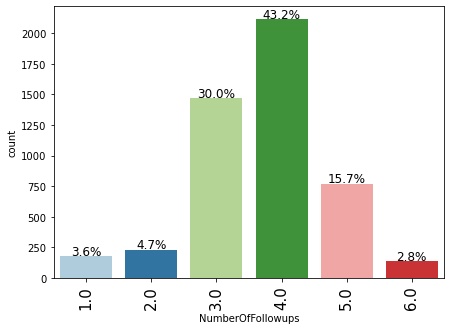

In [35]:
labeled_barplot(df, "NumberOfFollowups",perc=True)

<AxesSubplot:xlabel='NumberOfFollowups', ylabel='count'>

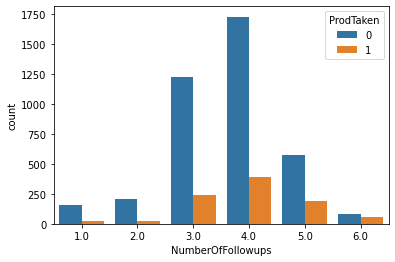

In [36]:
sns.countplot(df['NumberOfFollowups'], hue = df['ProdTaken'])

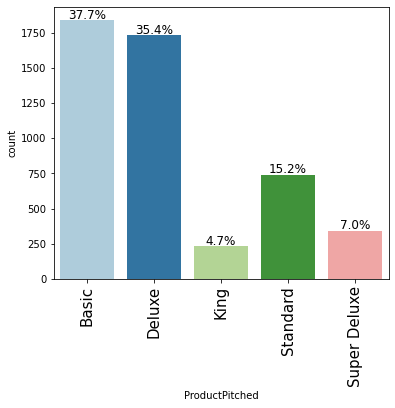

In [37]:
labeled_barplot(df, "ProductPitched",perc=True)

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

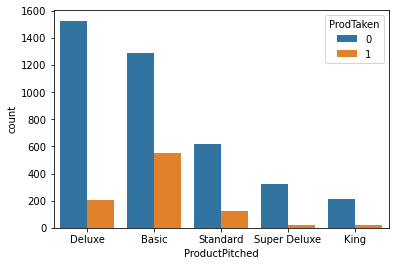

In [38]:
sns.countplot(df['ProductPitched'], hue = df['ProdTaken'])

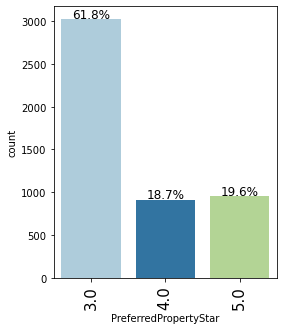

In [39]:
labeled_barplot(df, "PreferredPropertyStar",perc=True)

<AxesSubplot:xlabel='PreferredPropertyStar', ylabel='count'>

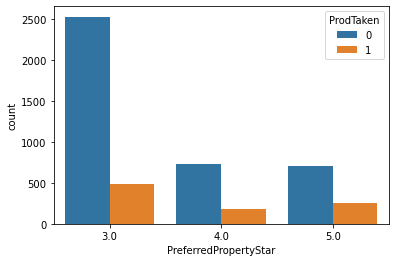

In [40]:
sns.countplot(df['PreferredPropertyStar'], hue = df['ProdTaken'])

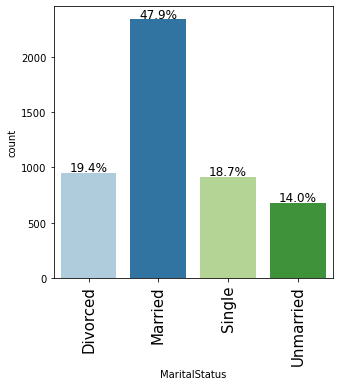

In [41]:
labeled_barplot(df, "MaritalStatus",perc=True)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

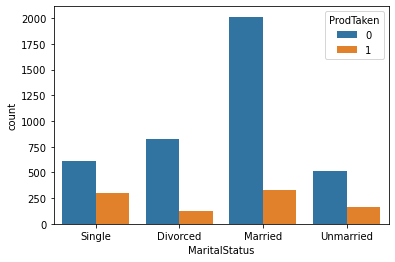

In [42]:
sns.countplot(df['MaritalStatus'], hue = df['ProdTaken'])

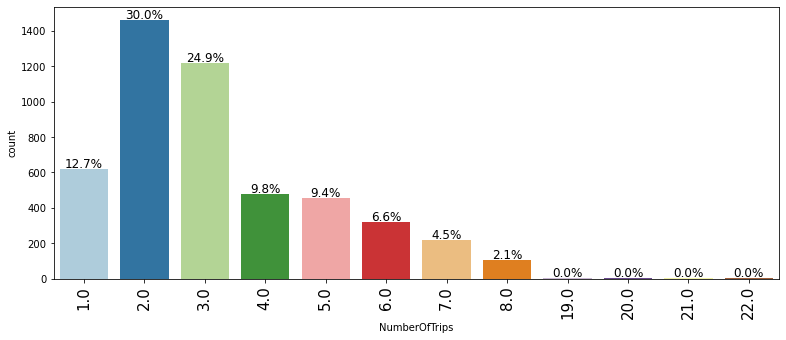

In [43]:
labeled_barplot(df, "NumberOfTrips",perc=True)

<AxesSubplot:xlabel='NumberOfTrips', ylabel='count'>

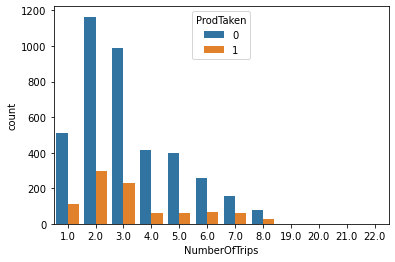

In [44]:
sns.countplot(df['NumberOfTrips'], hue = df['ProdTaken'])

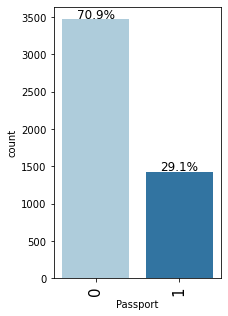

In [45]:
labeled_barplot(df, "Passport",perc=True)

<AxesSubplot:xlabel='Passport', ylabel='count'>

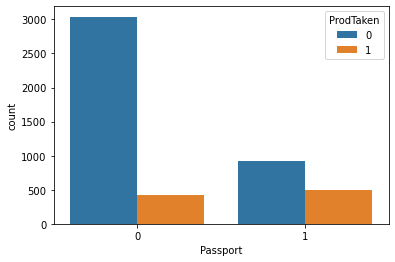

In [46]:
sns.countplot(df['Passport'], hue = df['ProdTaken'])

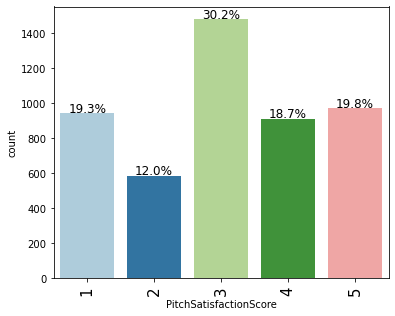

In [47]:
labeled_barplot(df, "PitchSatisfactionScore",perc=True)

<AxesSubplot:xlabel='PitchSatisfactionScore', ylabel='count'>

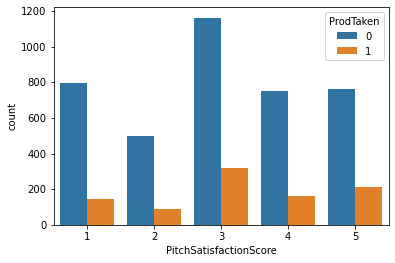

In [48]:
sns.countplot(df['PitchSatisfactionScore'], hue = df['ProdTaken'])

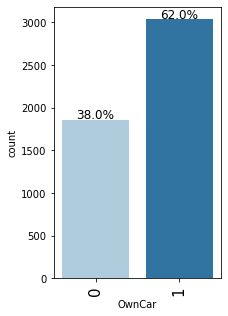

In [49]:
labeled_barplot(df, "OwnCar",perc=True)

<AxesSubplot:xlabel='OwnCar', ylabel='count'>

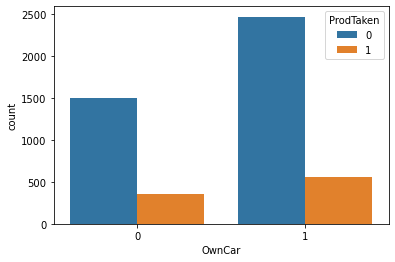

In [50]:
sns.countplot(df['OwnCar'], hue = df['ProdTaken'])

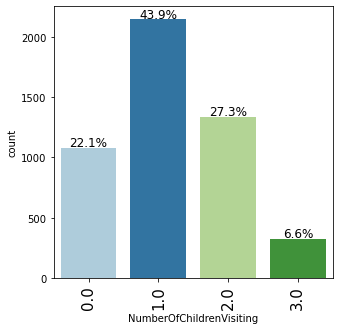

In [51]:
labeled_barplot(df, "NumberOfChildrenVisiting",perc=True)

<AxesSubplot:xlabel='NumberOfChildrenVisiting', ylabel='count'>

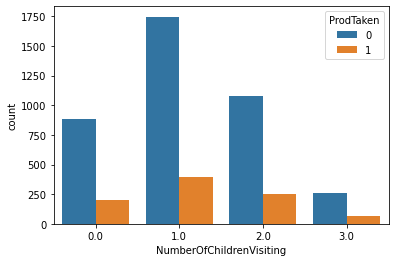

In [52]:
sns.countplot(df['NumberOfChildrenVisiting'], hue = df['ProdTaken'])

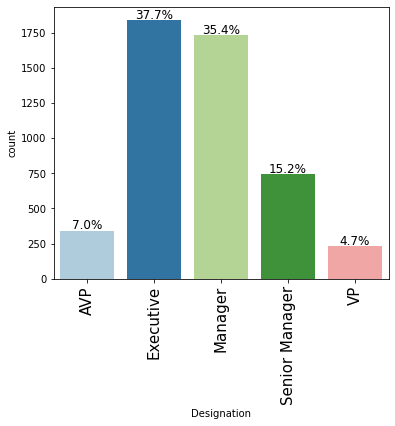

In [53]:
labeled_barplot(df, "Designation",perc=True)

<AxesSubplot:xlabel='Designation', ylabel='count'>

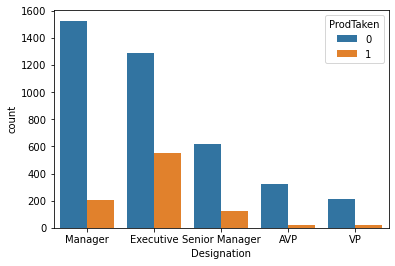

In [54]:
sns.countplot(df['Designation'], hue = df['ProdTaken'])

In [55]:
pd.set_option('display.max_rows', 200)
df.groupby(["ProductPitched"]).describe().transpose()

ProductPitched                         Basic        Deluxe          King  \
ProdTaken                count   1842.000000   1732.000000    230.000000   
                         mean       0.299674      0.117783      0.086957   
                         std        0.458240      0.322444      0.282386   
                         min        0.000000      0.000000      0.000000   
                         25%        0.000000      0.000000      0.000000   
                         50%        0.000000      0.000000      0.000000   
                         75%        1.000000      0.000000      0.000000   
                         max        1.000000      1.000000      1.000000   
CityTier                 count   1842.000000   1732.000000    230.000000   
                         mean       1.349620      1.928406      1.443478   
                         std        0.720177      0.986074      0.772805   
                         min        1.000000      1.000000      1.000000   
                         25%        1.000000      1.000000      1.000000   
                         50%        1.000000      1.000000      1.000000   
                         75%        1.000000      3.000000      2.000000   
                         max        3.000000      3.000000      3.000000   
DurationOfPitch          count   1842.000000   1732.000000    230.000000   
                         mean      15.122150     15.615473     12.100000   
                         std        8.509684      8.051033      5.764179   
                         min        5.000000      5.000000      5.000000   
                         25%        9.000000      9.000000      8.000000   
                         50%       13.000000     13.000000     11.000000   
                         75%       19.000000     19.000000     14.000000   
                         max      127.000000     36.000000     33.000000   
NumberOfPersonVisiting   count   1842.000000   1732.000000    230.000000   
                         mean       2.929967      2.891455      2.847826   
                         std        0.719091      0.728076      0.692044   
                         min        1.000000      1.000000      2.000000   
                         25%        2.000000      2.000000      2.000000   
                         50%        3.000000      3.000000      3.000000   
                         75%        3.000000      3.000000      3.000000   
                         max        5.000000      5.000000      4.000000   
NumberOfFollowups        count   1842.000000   1732.000000    230.000000   
                         mean       3.695983      3.707275      3.804348   
                         std        1.017434      1.009655      0.930313   
                         min        1.000000      1.000000      1.000000   
                         25%        3.000000      3.000000      3.000000   
                         50%        4.000000      4.000000      4.000000   
                         75%        4.000000      4.000000      4.000000   
                         max        6.000000      6.000000      6.000000   
PreferredPropertyStar    count   1842.000000   1732.000000    230.000000   
                         mean       3.585233      3.560046      3.430435   
                         std        0.792797      0.791621      0.706758   
                         min        3.000000      3.000000      3.000000   
                         25%        3.000000      3.000000      3.000000   
                         50%        3.000000      3.000000      3.000000   
                         75%        4.000000      4.000000      4.000000   
                         max        5.000000      5.000000      5.000000   
NumberOfTrips            count   1842.000000   1732.000000    230.000000   
                         mean       3.096091      3.281755      3.221739   
                         std        1.788063      1.906616      1.506451   
                         min        1.000000    

In [56]:
pd.set_option('display.max_rows', None)

# Some Additional Bivariate Analysis

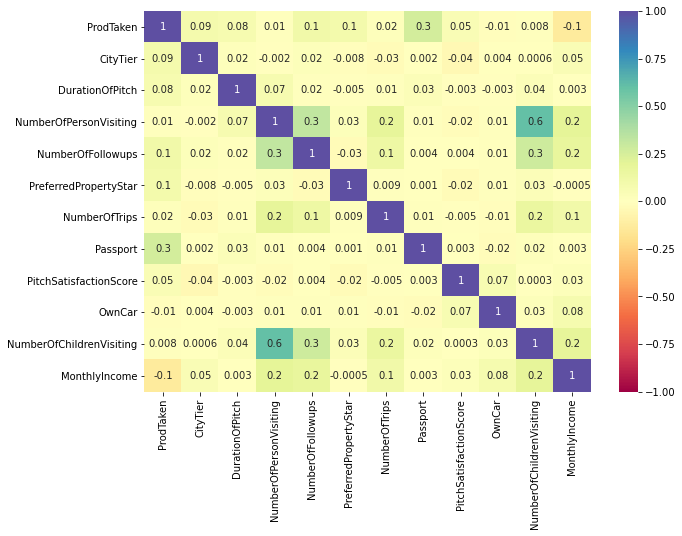

In [57]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g',cmap="Spectral")
plt.show()

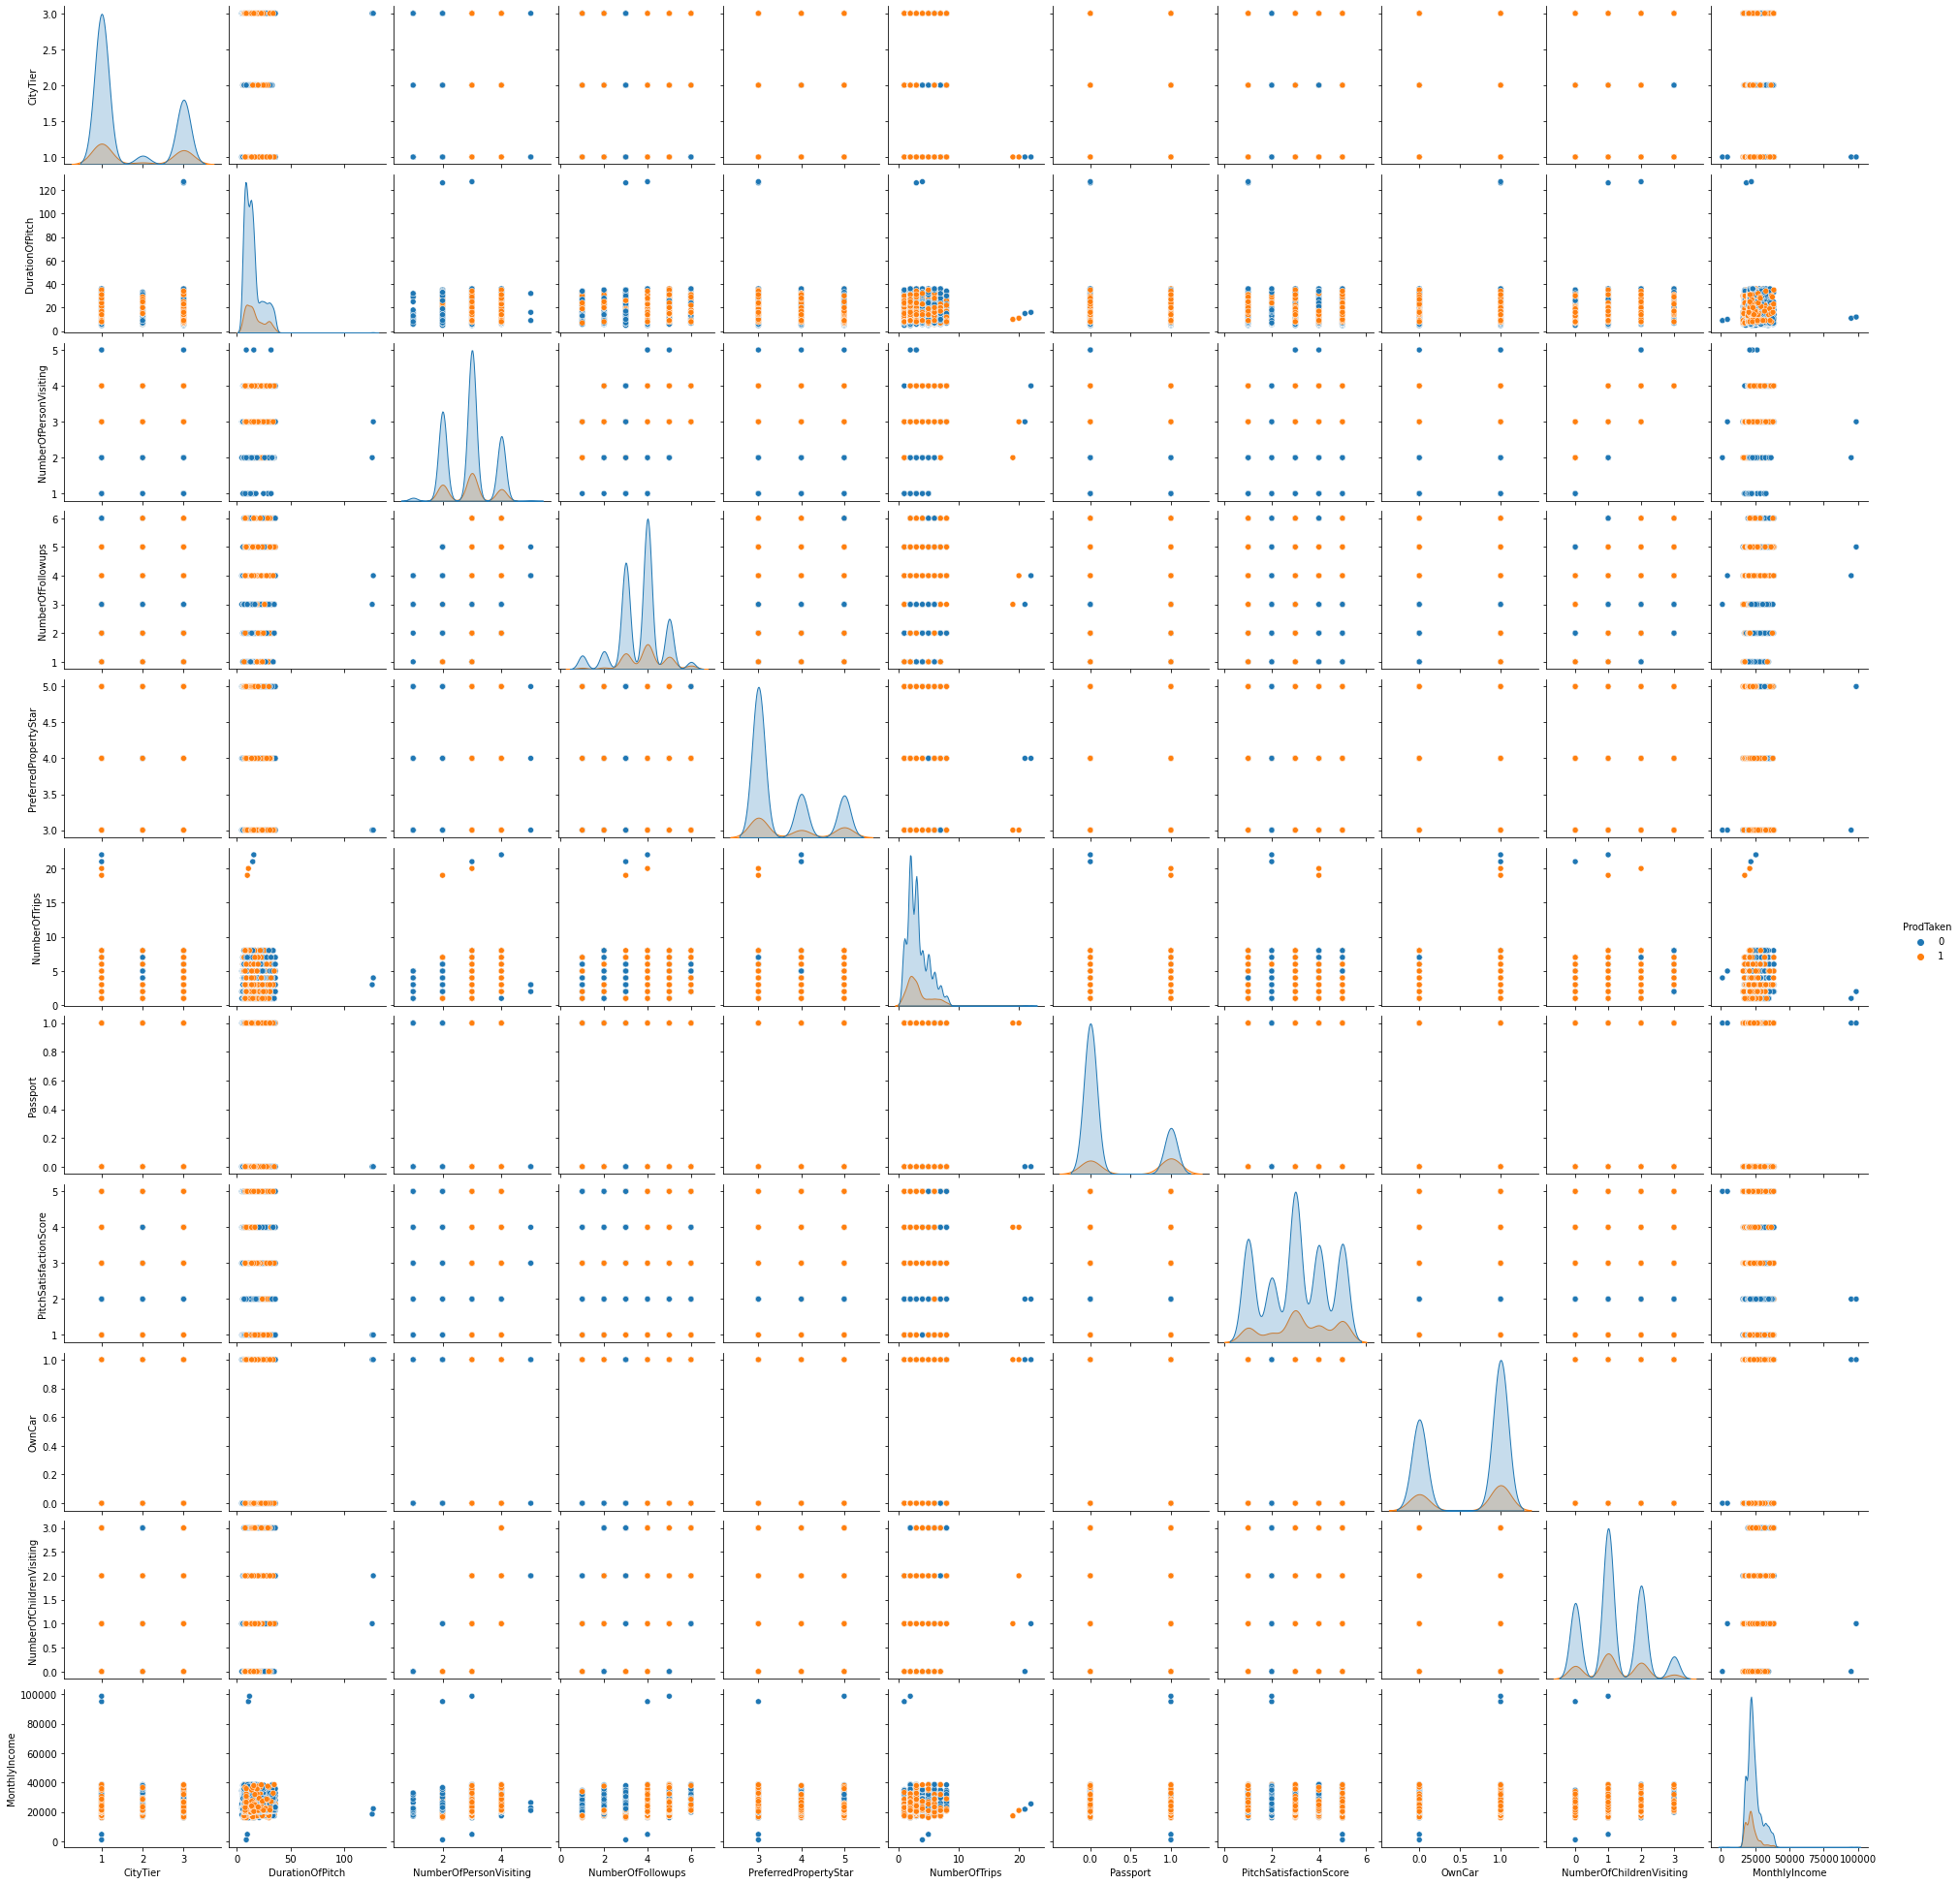

In [58]:
sns.pairplot(df, hue = 'ProdTaken')
plt.show()

# Model Building - Splitting Data Into Train and Test

In [59]:
## Separating features and the target column
X = df.drop('ProdTaken', axis=1)
y = df['ProdTaken']

In [60]:
## Create dummy variables

def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(X)
ind_vars_num.head()

,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,...,0,0,0,0,1,0,0,1,0,0
1,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,...,0,0,0,0,0,0,0,1,0,0
2,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,...,0,0,0,0,1,0,1,0,0,0
3,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,...,0,0,0,0,0,0,1,0,0,0
4,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,...,0,0,0,0,0,0,1,0,0,0


In [61]:
ind_vars_num.columns = [c.replace(' ', '_') for c in ind_vars_num.columns]

In [62]:
ind_vars_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CityTier                     4888 non-null   int64  
 1   DurationOfPitch              4888 non-null   float64
 2   NumberOfPersonVisiting       4888 non-null   int64  
 3   NumberOfFollowups            4888 non-null   float64
 4   PreferredPropertyStar        4888 non-null   float64
 5   NumberOfTrips                4888 non-null   float64
 6   Passport                     4888 non-null   int64  
 7   PitchSatisfactionScore       4888 non-null   int64  
 8   OwnCar                       4888 non-null   int64  
 9   NumberOfChildrenVisiting     4888 non-null   float64
 10  MonthlyIncome                4888 non-null   float64
 11  Age_Adult                    4888 non-null   uint8  
 12  Age_Senior                   4888 non-null   uint8  
 13  TypeofContact_Self

In [63]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(ind_vars_num, y, test_size=0.30, random_state=1, shuffle=True)

In [64]:
X_train.shape, X_test.shape

((3421, 29), (1467, 29))

In [65]:
y_train.value_counts(1)

0    0.817597
1    0.182403
Name: ProdTaken, dtype: float64

In [66]:
y_test.value_counts(1)

0    0.798228
1    0.201772
Name: ProdTaken, dtype: float64

# Model Building - Model Evaluation Criteria

In [67]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [68]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.90593  0.722973   0.792593  0.756184


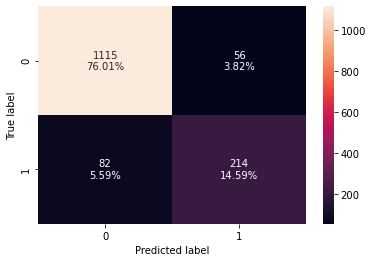

In [69]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

In [70]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=6,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.90593  0.722973   0.792593  0.756184


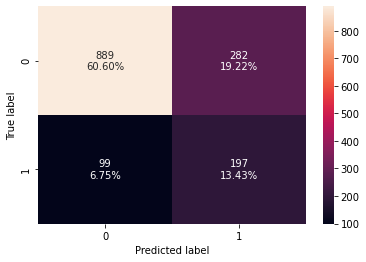

In [71]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

# Random Forest Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999708  0.998397        1.0  0.999198
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.899114  0.530405   0.945783  0.679654


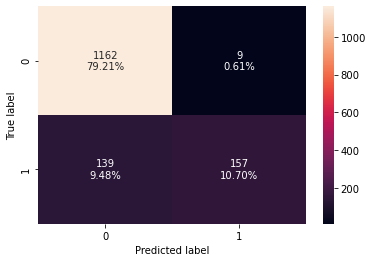

In [72]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

In [73]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=15,
                       max_features=None, min_samples_split=7, oob_score=True,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.995031  0.996795   0.976452  0.986519
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.904567  0.635135   0.854545  0.728682


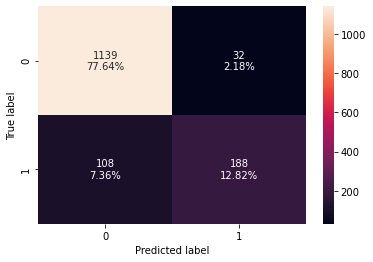

In [74]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

# Bagging Classifier

   Accuracy    Recall  Precision       F1
0  0.994154  0.969551    0.99835  0.98374
   Accuracy    Recall  Precision        F1
0  0.895706  0.560811   0.878307  0.684536


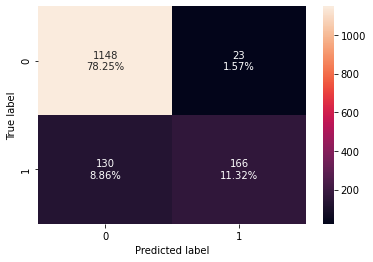

In [75]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

In [76]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

   Accuracy    Recall  Precision        F1
0  0.999415  0.996795        1.0  0.998395
   Accuracy    Recall  Precision        F1
0  0.908657  0.601351   0.917526  0.726531


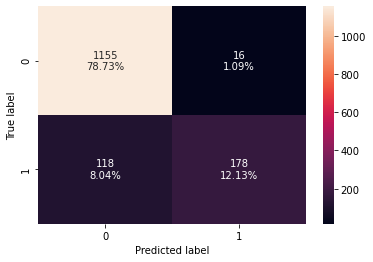

In [77]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

# AdaBoost Classifier

   Accuracy   Recall  Precision        F1
0  0.849459  0.31891   0.688581  0.435926
   Accuracy    Recall  Precision        F1
0  0.828903  0.253378   0.714286  0.374065


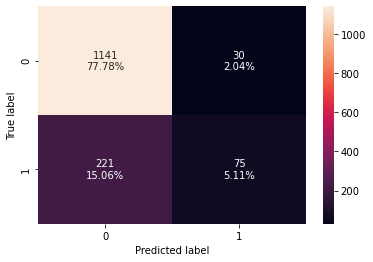

In [78]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [79]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.7000000000000001, n_estimators=100,
                   random_state=1)

   Accuracy    Recall  Precision        F1
0  0.975738  0.895833   0.968804  0.930891
   Accuracy    Recall  Precision        F1
0  0.892979  0.570946   0.849246  0.682828


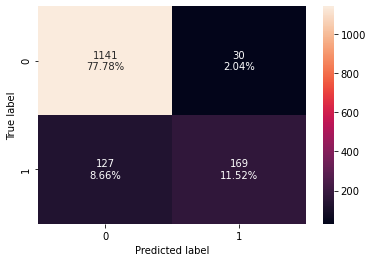

In [80]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

# Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.883952  0.455128   0.832845  0.588601
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.850034  0.351351   0.787879  0.485981


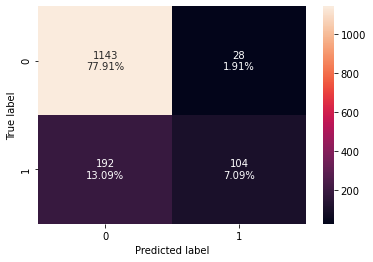

In [81]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [82]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=1,
                           subsample=0.9)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.918445  0.612179   0.911695  0.732502
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.865031  0.429054   0.814103  0.561947


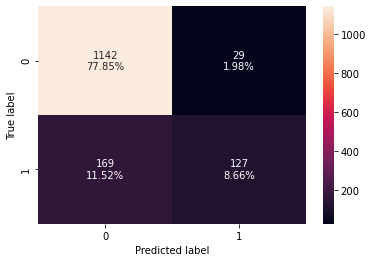

In [83]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

# XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999415  0.996795        1.0  0.998395
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.922972  0.679054   0.917808  0.780583


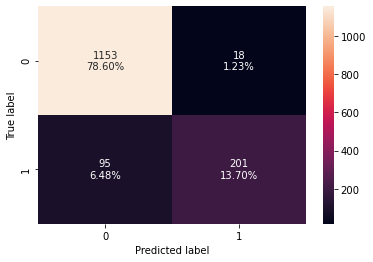

In [84]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [85]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1, ...)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.976323  0.995192   0.888412  0.938776
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.901159  0.783784   0.741214  0.761905


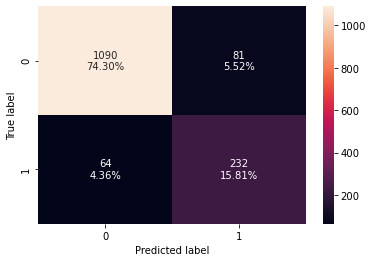

In [86]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [87]:
print (pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Passport                     0.165584
Designation_Executive        0.087114
MaritalStatus_Single         0.048323
ProductPitched_Super_Deluxe  0.045744
CityTier                     0.036912
PreferredPropertyStar        0.036343
Occupation_Large_Business    0.036248
Designation_Senior_Manager   0.035520
NumberOfFollowups            0.034063
PitchSatisfactionScore       0.033662
Designation_Manager          0.032787
DurationOfPitch              0.031626
ProductPitched_Standard      0.031385
NumberOfTrips                0.029918
MaritalStatus_Unmarried      0.029878
MaritalStatus_Married        0.026783
TypeofContact_Self_Enquiry   0.026715
Occupation_Small_Business    0.026111
Age_Adult                    0.025941
MonthlyIncome                0.025617
ProductPitched_Deluxe        0.025134
Gender_Male                  0.023518
Occupation_Salaried          0.020885
ProductPitched_King          0.020752
Age_Senior                   0.019204
NumberOfPers

# Stacking Classifier

In [88]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

fit_model = stacking_classifier.fit(X_train,y_train)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.971646  0.996795   0.867503  0.927666
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.898432  0.834459   0.711816  0.768274


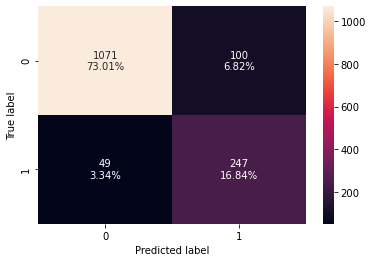

In [89]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

# Comparing All Models

In [90]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,1.0,0.999708,0.995031,0.994154,0.999415,0.849459,0.975738,0.883952,0.918445,0.999415,0.976323,0.971646
Recall,1.0,1.0,0.998397,0.996795,0.969551,0.996795,0.318910,0.895833,0.455128,0.612179,0.996795,0.995192,0.996795
Precision,1.0,1.0,1.000000,0.976452,0.998350,1.000000,0.688581,0.968804,0.832845,0.911695,1.000000,0.888412,0.867503
F1,1.0,1.0,0.999198,0.986519,0.983740,0.998395,0.435926,0.930891,0.588601,0.732502,0.998395,0.938776,0.927666


In [91]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.905930,0.905930,0.899114,0.904567,0.895706,0.908657,0.828903,0.892979,0.850034,0.865031,0.922972,0.901159,0.898432
Recall,0.722973,0.722973,0.530405,0.635135,0.560811,0.601351,0.253378,0.570946,0.351351,0.429054,0.679054,0.783784,0.834459
Precision,0.792593,0.792593,0.945783,0.854545,0.878307,0.917526,0.714286,0.849246,0.787879,0.814103,0.917808,0.741214,0.711816
F1,0.756184,0.756184,0.679654,0.728682,0.684536,0.726531,0.374065,0.682828,0.485981,0.561947,0.780583,0.761905,0.768274


# Model Save

In [92]:
import pickle

In [93]:
pkl_filename = "stacking_classifier.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(stacking_classifier, file)

In [94]:
# Load from file if needed
#with open(pkl_filename, 'rb') as file:
#    pickle_model = pickle.load(file)

# Actionable Insights & Recommendations